
# Trabajo Práctico 2


Descargar el dataset **Facebook comment volume** https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset. 

El dataset tiene diferentes versiones, utilizaremos la **número 5** para train y para test **Features_TestSet**. 

Notar que trae **carpeta de train y de test**. 

Una descripcióm completa del dataset pueden encontrarla en el link. Se trata de publicaciones de Facebook y se quiere **predecir la columna 54: cantidad de comentarios en las próximas H horas"**.

El dataset contiene variables en muchos formatos diferentes, algunos de los cuales no hemos trabajado o no lo hemos hechos en profundidad. Esas variables pueden ser descartadas o bien hacer una investigación personal para ver de qué manera poder incluirlas para mejorar los resultados obtenidos.



# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

### Nota: 

> - Como el dataset no contiene los nombres de las columnas, he decidido agregarlas para tener mas claro como las variables se presentan y se relacionan.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn import metrics

# Cargar datos
Cargar los datos de entrenamiento.

In [3]:
# Cargo el dataset, para el TP es el caso 5
data=pd.read_csv('./Dataset/Training/Features_Variant_5.csv')
# Observamos las primeras filas y columnas
data.head()
# De la informacion del dataset cada columna esta representada por:
# likes | checkins | returns

,Likes,Checkins,About,Category,CC1 Min,CC1 Max,CC1 Avg,CC1 Median,CC1 Std,CC2 Min,...,Post Published Weekday 45,Post Published Weekday 46,Base DateTime Weekday 47,Base DateTime Weekday 48,Base DateTime Weekday 49,Base DateTime Weekday 50,Base DateTime Weekday 51,Base DateTime Weekday 52,Base DateTime Weekday 53,Target
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,1,0,0,0,0,0,0,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0


## Información de los Atributos 

- #### 1 Page Popularity/likes
> Decimal Encoding Page feature Defines the popularity or support for the source of the document.

- #### 2 Page Checkins
> Decimal Encoding Page feature Describes how many individuals so far visited this place. This feature is only associated with the places eg:some institution, place, theater etc.

- #### 3 Page talking about
> Decimal Encoding Page feature Defines the daily interest of individuals towards source of the document/ Post. The people who actually come back to the page, after liking the page. This include activities such as comments, likes to a post, shares, etc by visitors to the page.

- #### 4 Page Category
> Value Encoding Page feature Defines the category of the source of the document eg: place, institution, brand etc.

- #### 5 - 29 Derived
> Decimal Encoding Derived feature These features are aggregated by page, by calculating min, max, average, median and standard deviation of essential features.

- #### 30 CC1
> Decimal Encoding Essential feature The total number of comments before selected base date/time.

- #### 31 CC2
> Decimal Encoding Essential feature The number of comments in last 24 hours, relative to base date/time.

- #### 32 CC3
> Decimal Encoding Essential feature The number of comments in last 48 to last 24 hours relative to base date/time.

- #### 33 CC4
> Decimal Encoding Essential feature The number of comments in the first 24 hours after the publication of post but before base date/time.

- #### 34 CC5
> Decimal Encoding Essential feature The difference between CC2 and CC3.

- #### 35 Base time
> Decimal(0-71) Encoding Other feature Selected time in order to simulate the scenario.

- #### 36 Post length
> Decimal Encoding Other feature Character count in the post.

- #### 37 Post Share Count
> Decimal Encoding Other feature This features counts the no of shares of the post, that how many peoples had shared this post on to their timeline.

- #### 38 Post Promotion Status
> Binary Encoding Other feature To reach more people with posts in News Feed, individual promote their post and this features tells that whether the post is promoted(1) or not(0).

- #### 39 H Local
> Decimal(0-23) Encoding Other feature This describes the H hrs, for which we have the target variable/ comments received.

- #### 40-46 Post published weekday
> Binary Encoding Weekdays feature This represents the day(Sunday...Saturday) on which the post was published.

- #### 47-53 Base DateTime weekday
> Binary Encoding Weekdays feature This represents the day(Sunday...Saturday) on selected base Date/Time.

- #### 54 Target Variable
> Decimal Target The no of comments in next H hrs(H is given in Feature no 39).

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario. 

In [4]:
# Para conocer los datos podemos utilizar describe, que nos da una idea de como estan distribuidos, su media, desvicacion std, mínimos, máximos y cantidades...
data.describe()

,Likes,Checkins,About,Category,CC1 Min,CC1 Max,CC1 Avg,CC1 Median,CC1 Std,CC2 Min,...,Post Published Weekday 45,Post Published Weekday 46,Base DateTime Weekday 47,Base DateTime Weekday 48,Base DateTime Weekday 49,Base DateTime Weekday 50,Base DateTime Weekday 51,Base DateTime Weekday 52,Base DateTime Weekday 53,Target
count,1.990300e+05,199030.000000,1.990300e+05,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,...,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.00000,199030.000000
mean,1.313785e+06,4674.517731,4.477173e+04,24.242074,0.470256,485.317656,55.901120,35.263538,68.090731,0.068135,...,0.146209,0.136954,0.139391,0.134829,0.136788,0.147088,0.155298,0.144245,0.14236,7.168708
std,6.771131e+06,20573.440641,1.108983e+05,19.935334,13.178067,538.194418,86.515496,68.162671,82.411057,2.172591,...,0.353317,0.343800,0.346355,0.341542,0.343625,0.354195,0.362190,0.351338,0.34942,34.298193
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,49.000000,5.494737,2.000000,8.033255,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.929110e+05,0.000000,7.237000e+03,18.000000,0.000000,256.000000,23.647407,12.000000,35.022296,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,784.000000,70.931961,41.000000,104.152684,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1458.000000,2495.000000,2031.000000,2123.000000,762.357746,227.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1702.000000


In [5]:
# Chequeo cuantos datos nulos hay en cada una de las columnas y obtengo una suma de ellos.
data.isnull().all()

Likes                        False
Checkins                     False
About                        False
Category                     False
CC1 Min                      False
CC1 Max                      False
CC1 Avg                      False
CC1 Median                   False
CC1 Std                      False
CC2 Min                      False
CC2 Max                      False
CC2 Avg                      False
CC2 Median                   False
CC2 Std                      False
CC3 Min                      False
CC3 Max                      False
CC3 Avg                      False
CC3 Median                   False
CC3 Std                      False
CC4 Min                      False
CC4 Max                      False
CC4 Avg                      False
CC4 Median                   False
CC4 Std                      False
CC5 Min                      False
CC5 Max                      False
CC5 Avg                      False
CC5 Median                   False
CC5 Std             

In [6]:
# Otra manera de visualización de los datos para conocer sus tipos y cantidad de columnas.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199030 entries, 0 to 199029
Data columns (total 54 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Likes                      199030 non-null  int64  
 1   Checkins                   199030 non-null  int64  
 2   About                      199030 non-null  int64  
 3   Category                   199030 non-null  int64  
 4   CC1 Min                    199030 non-null  float64
 5   CC1 Max                    199030 non-null  float64
 6   CC1 Avg                    199030 non-null  float64
 7   CC1 Median                 199030 non-null  float64
 8   CC1 Std                    199030 non-null  float64
 9   CC2 Min                    199030 non-null  float64
 10  CC2 Max                    199030 non-null  float64
 11  CC2 Avg                    199030 non-null  float64
 12  CC2 Median                 199030 non-null  float64
 13  CC2 Std                    19

In [7]:
# Observamos que hay una columna que tiene en todos sus datos 0 por lo que no es relevante para el analisis.
data.iloc[:,35:40].describe()

,Post Length,Post Share Count,Post Promotion Status,H Local,Post Published Weekday 40
count,199030.000000,199030.000000,199030.0,199030.000000,199030.000000
mean,163.692092,117.363337,0.0,23.783274,0.122484
std,375.663067,954.359456,0.0,1.827157,0.327845
min,0.000000,1.000000,0.0,1.000000,0.000000
25%,38.000000,2.000000,0.0,24.000000,0.000000
50%,97.000000,13.000000,0.0,24.000000,0.000000
75%,172.000000,61.000000,0.0,24.000000,0.000000
max,21480.000000,144860.000000,0.0,24.000000,1.000000


Text(0, 0.5, 'Target')

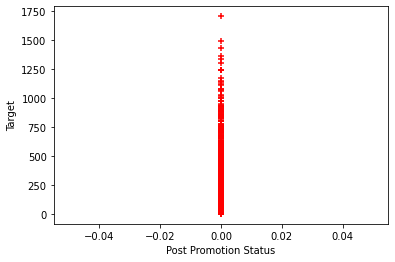

In [8]:
plt.scatter(data['Post Promotion Status'],data['Target'],marker='+',color='red')
plt.xlabel('Post Promotion Status')
plt.ylabel('Target')

Text(0, 0.5, 'Target')

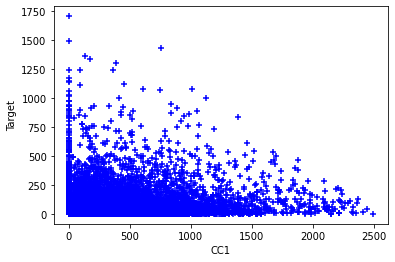

In [9]:
plt.scatter(data['CC1'],data['Target'],marker='+',color='blue')
plt.xlabel('CC1')
plt.ylabel('Target')

In [10]:
# Podemos ver que el Post Promotion Status, tiene siempre el mismo valor 0, y no me aporta informacion al analisis,
# Entonces, desecho el feature.

dataOp = data.drop('Post Promotion Status', axis=1)
dataOp.shape

(199030, 53)

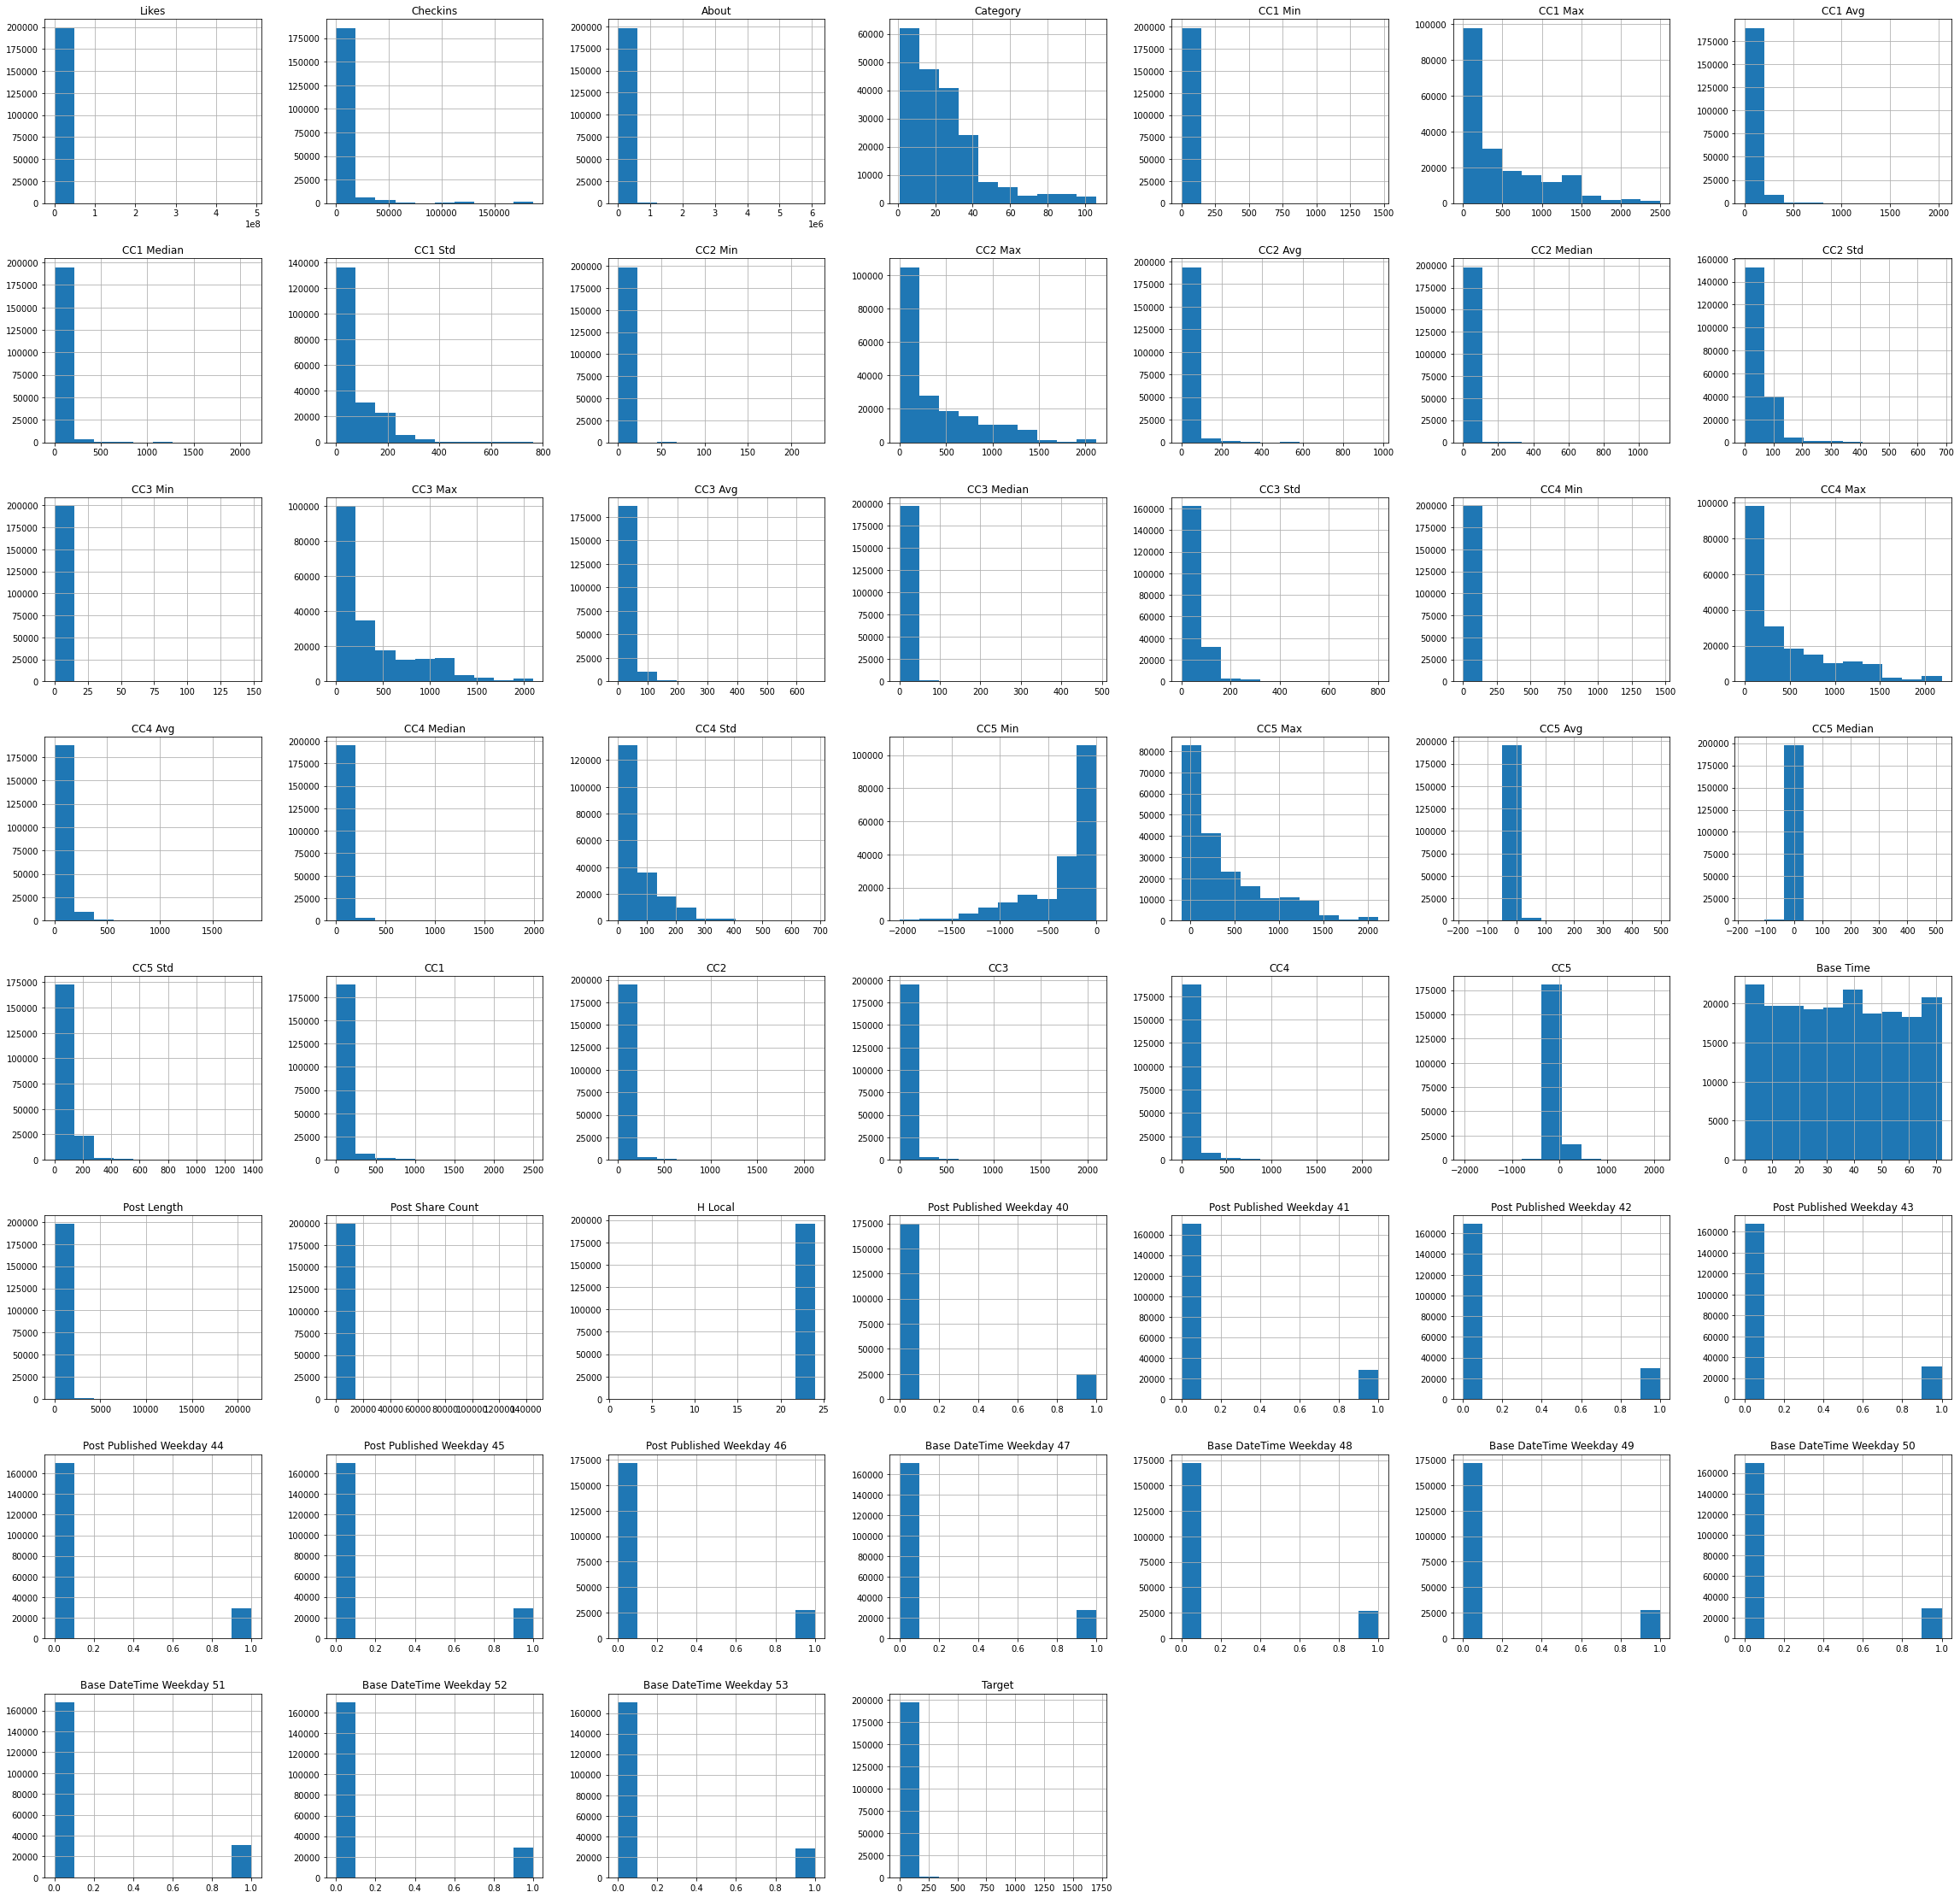

In [11]:
# Graficamos un histograma de cada uno de los parámetros.

dataOp.hist(figsize=(40,40))
plt.show()

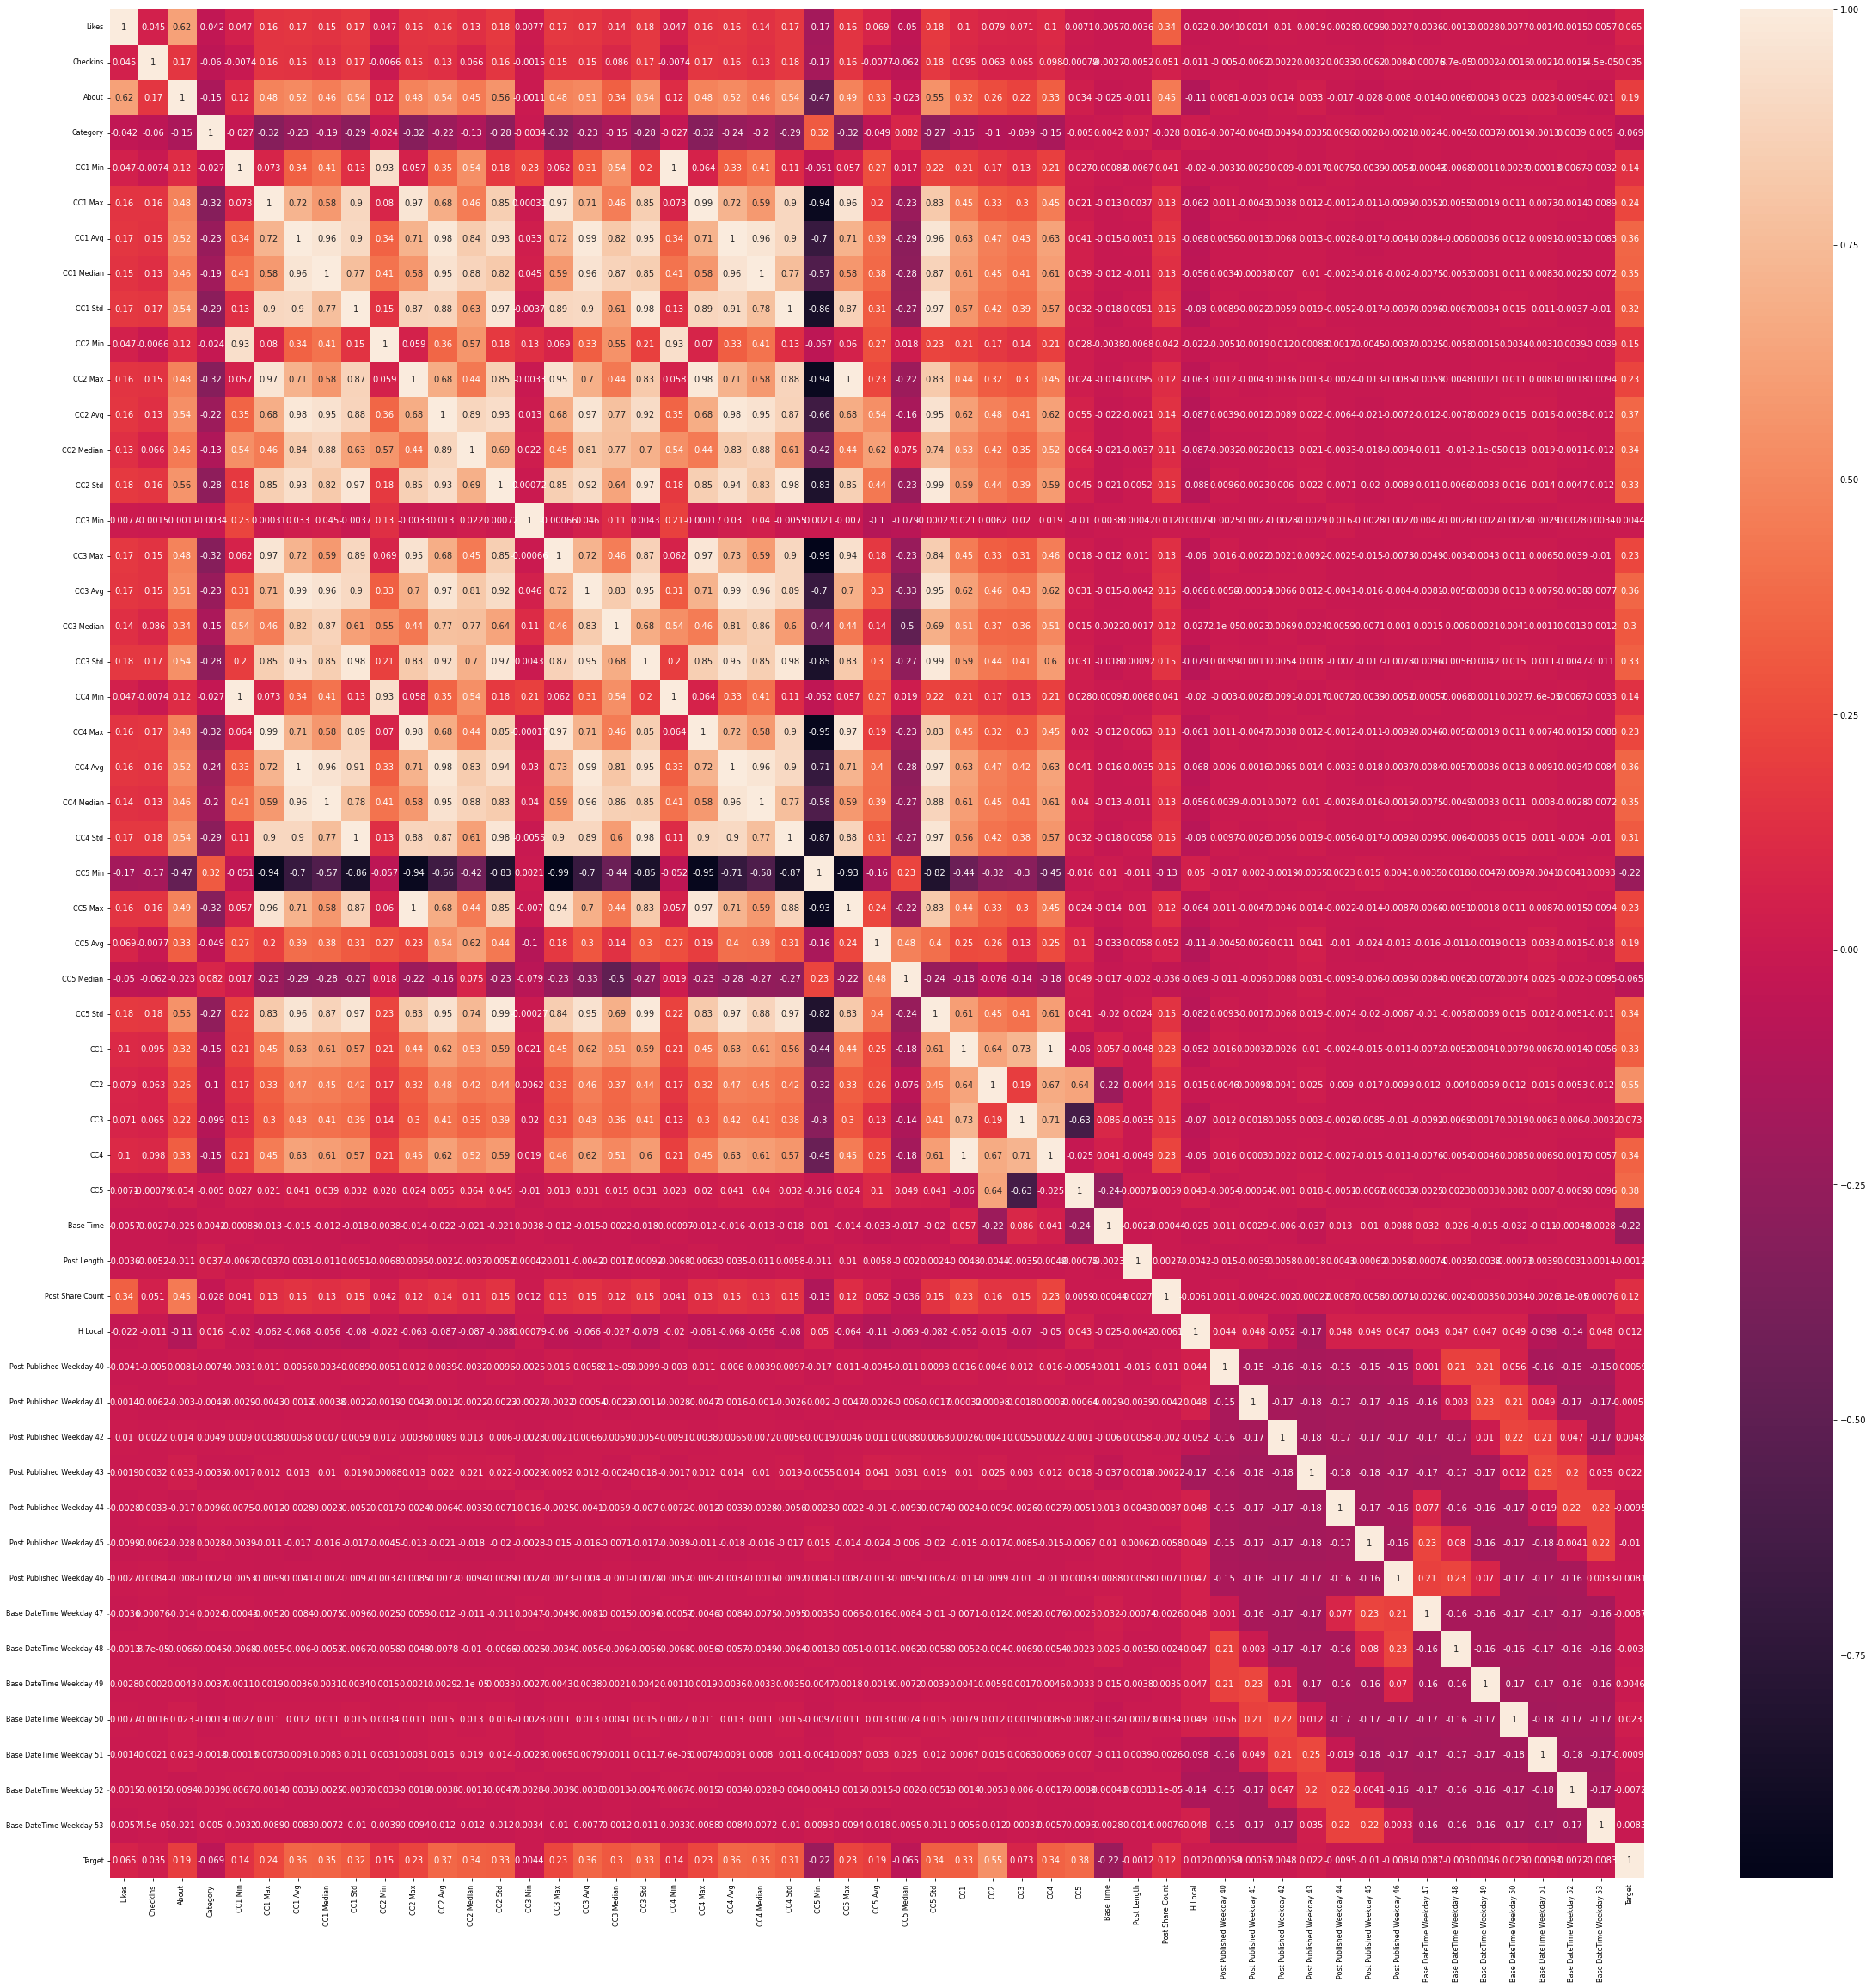

In [12]:
# Estudio de la correlación entre las variables

corr_matrix_op = dataOp.corr(method='pearson')

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(figsize=(40, 40))

sns.heatmap(
    corr_matrix_op,
    annot=True
)

ax.tick_params(labelsize = 8)

## Split del Dataset

Separamos el dataset en train y test. Además debemos tomar como variable de salida Y='Target'.

In [13]:
# División de los datos en train y test

X = dataOp.drop(columns='Target',axis=1)
y = dataOp[['Target']]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

y.shape

(199030, 1)

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

## Regresion Lineal


In [14]:
# Creación y entrenamiento del modelo
from sklearn import linear_model

linearModel = linear_model.LinearRegression()





In [15]:
# Entrenamos los datos con el modelo de regresion lineal

linearModel.fit(X = X_train, y = y_train)

linearModel.feature_names_in_


array(['Likes', 'Checkins', 'About', 'Category', 'CC1 Min', 'CC1 Max',
       'CC1 Avg', 'CC1 Median', 'CC1 Std', 'CC2 Min', 'CC2 Max',
       'CC2 Avg', 'CC2 Median', 'CC2 Std', 'CC3 Min', 'CC3 Max',
       'CC3 Avg', 'CC3 Median', 'CC3 Std', 'CC4 Min', 'CC4 Max',
       'CC4 Avg', 'CC4 Median', 'CC4 Std', 'CC5 Min', 'CC5 Max',
       'CC5 Avg', 'CC5 Median', 'CC5 Std', 'CC1', 'CC2', 'CC3', 'CC4',
       'CC5', 'Base Time', 'Post Length', 'Post Share Count', 'H Local',
       'Post Published Weekday 40', 'Post Published Weekday 41',
       'Post Published Weekday 42', 'Post Published Weekday 43',
       'Post Published Weekday 44', 'Post Published Weekday 45',
       'Post Published Weekday 46', 'Base DateTime Weekday 47',
       'Base DateTime Weekday 48', 'Base DateTime Weekday 49',
       'Base DateTime Weekday 50', 'Base DateTime Weekday 51',
       'Base DateTime Weekday 52', 'Base DateTime Weekday 53'],
      dtype=object)

Text(0.5, 1.0, 'Parámetros del modelo')

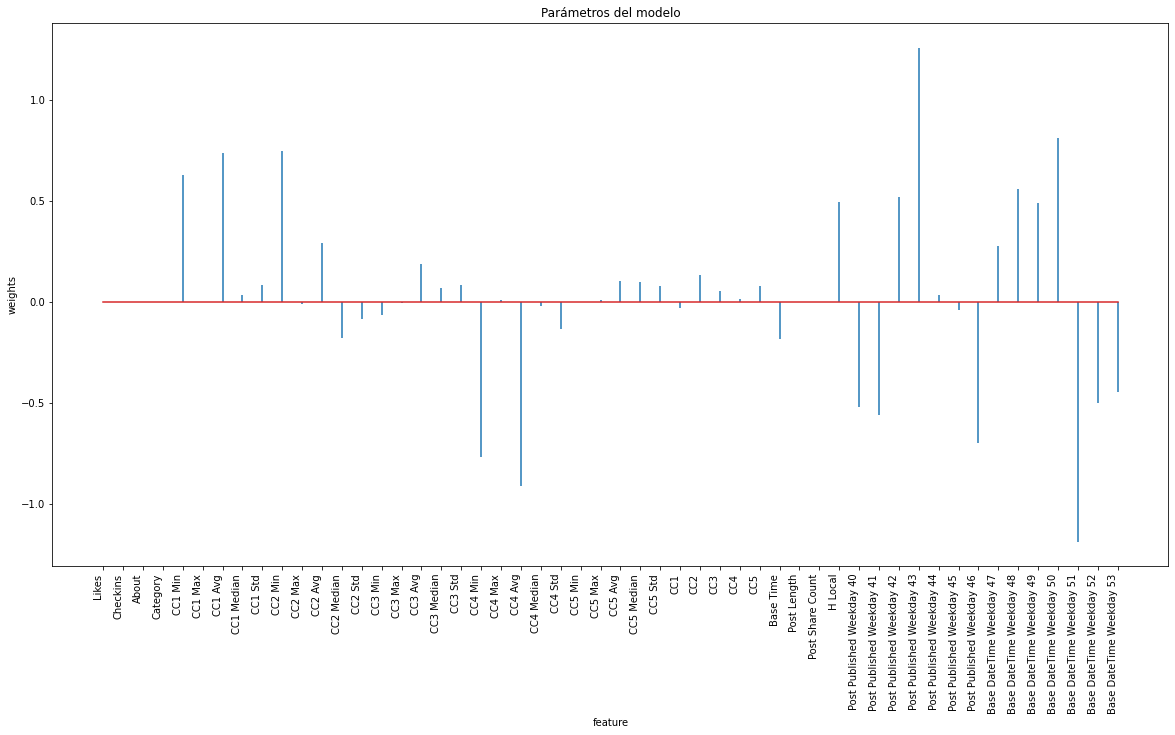

In [16]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': linearModel.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

In [17]:
# Predicciones test

predicciones = linearModel.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:50]

array([ 7.56084158e+00,  3.54844110e+00,  4.95694718e+00, -6.01447418e+00,
        6.19445916e+00,  5.30835714e+00,  9.00928631e+00,  1.01686591e+01,
        1.78431053e+01,  2.01109212e+01,  1.56635384e+01,  1.72470035e-01,
        1.28008442e+00,  1.09907720e+01, -3.27105853e+00,  2.73035517e+01,
        6.09110411e+01,  2.65638281e+01,  5.52725186e+00, -1.88865230e+00,
        1.43414962e+00,  6.41982935e+00,  1.83679887e-01, -3.39779651e+00,
        4.91459781e+01,  2.73598202e+00, -3.82438002e-02,  1.64728093e-01,
       -5.54596419e-01,  6.18680940e+00, -4.53534573e+00,  9.56664605e+00,
       -1.66892049e+00,  4.31016965e+00,  1.50818391e+01,  5.12409659e+00,
       -1.30389090e+00,  4.43040067e+00,  6.65081510e+00,  4.81000821e-01,
       -4.78060326e+00, -6.50305240e+00,  1.00948189e+01,  1.66293248e+01,
        7.12314446e-02,  7.09448425e+00,  4.76099334e+00,  1.75753903e+01,
       -1.05620536e+00,  2.54155719e+01])

In [18]:
# Score del modelo. 
# Buscamos un score cercano a 1 para que nuestra prediccion sea confiable.
# El score esta determinado por el coeficiente de determinacion R^2
linearModel.score(X_test,y_test)

0.37002103027225275

In [19]:
# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir

rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )

print(f"El error (rmse) de test es: {rmse_ols}")

El error (rmse) de test es: 26.157760534465197


In [20]:
(y_test - predicciones.reshape(y_test.shape)).shape

(59709, 1)

### Análisis de Residuos 

Llamamos residuos a las diferencias entre los valores de la variable dependiente observados y los valores que predecimos a partir de nuestra recta de regresión.

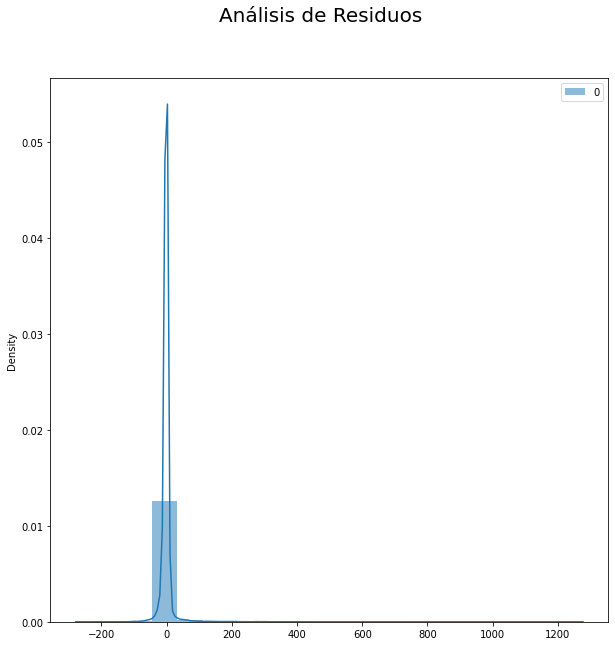

In [21]:
fig = plt.figure(figsize=(10,10))
  
sns.histplot((y_test - predicciones.reshape(y_test.shape)), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)    
plt.show()

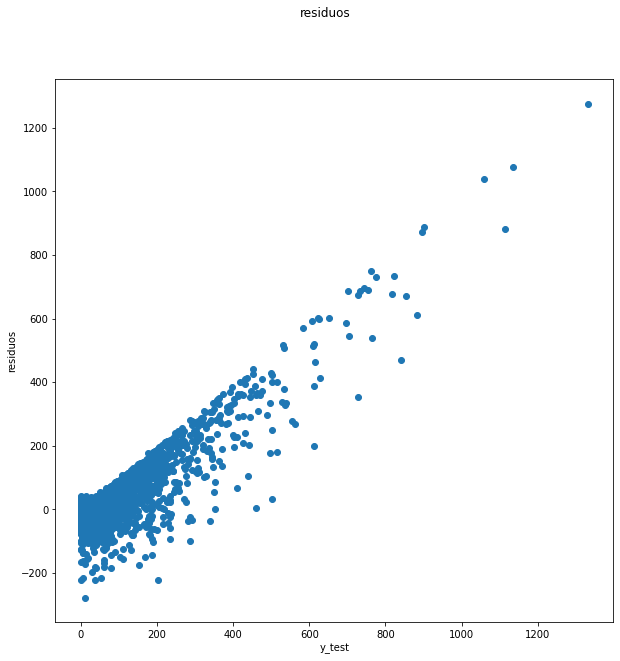

In [22]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('residuos')

plt.xlabel('y_test')

plt.ylabel('residuos')

plt.scatter(y_test,y_test-predicciones.reshape(-1, 1))
plt.show()

## Regresion Ridge

#### Creación y entrenamiento del modelo.



In [23]:
import warnings
warnings.filterwarnings("ignore")

ridgeModel = RidgeCV(
            alphas          = np.logspace(-10, 10, 100),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = ridgeModel.fit(X = X_train, y = y_train)



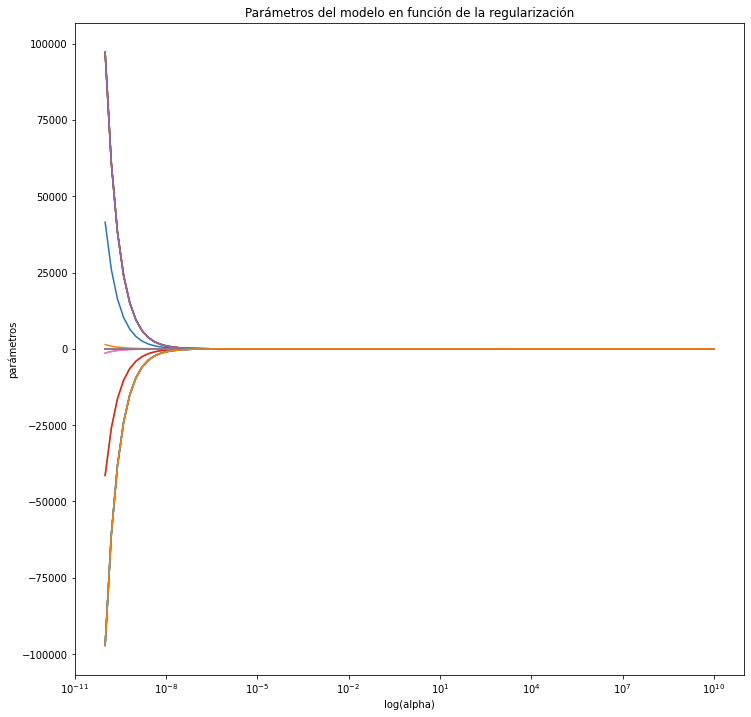

In [24]:
# Evolución de los parámetros en función de alpha

alphas = ridgeModel.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo en función de la regularización')
plt.axis('tight')
plt.show()

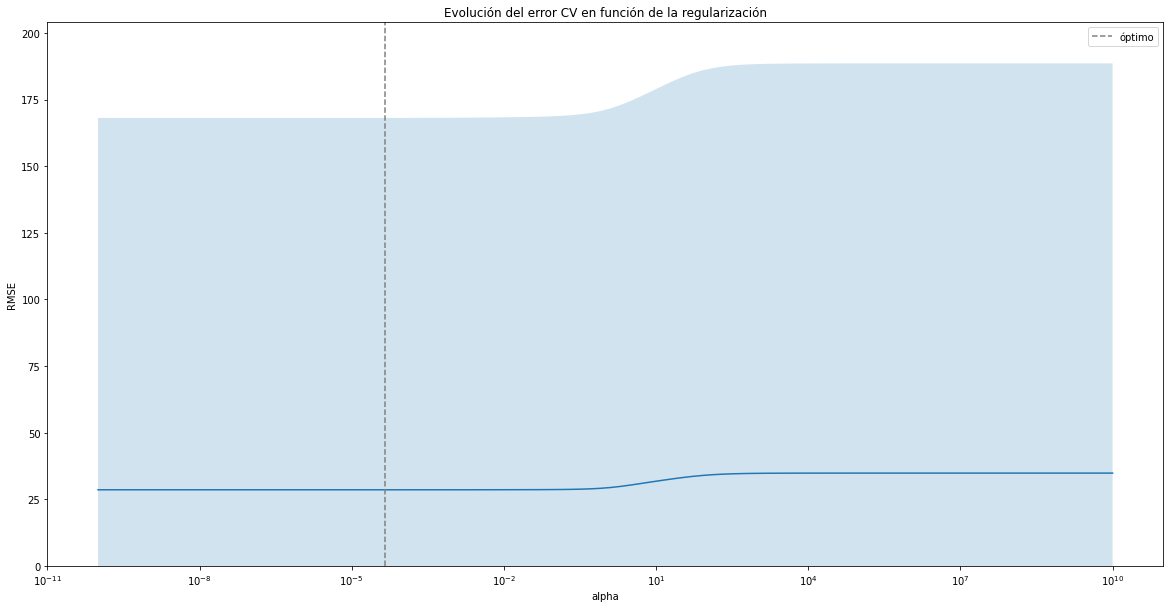

In [25]:
# Evolución del error de validación cruzada en función de alpha

# ridgeModel.cv_values almacena el mse de cv para cada valor de alpha. Tiene dimensiones (n_samples, n_targets, n_alphas)

mse_cv = ridgeModel.cv_values_.reshape((-1, 100)).mean(axis=0)
mse_sd = ridgeModel.cv_values_.reshape((-1, 100)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
optimo       = ridgeModel.alphas[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar (fill area)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(ridgeModel.alphas, rmse_cv)
ax.fill_between(
    ridgeModel.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [26]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {ridgeModel.alpha_}")

Mejor valor de alpha encontrado: 4.534878508128582e-05


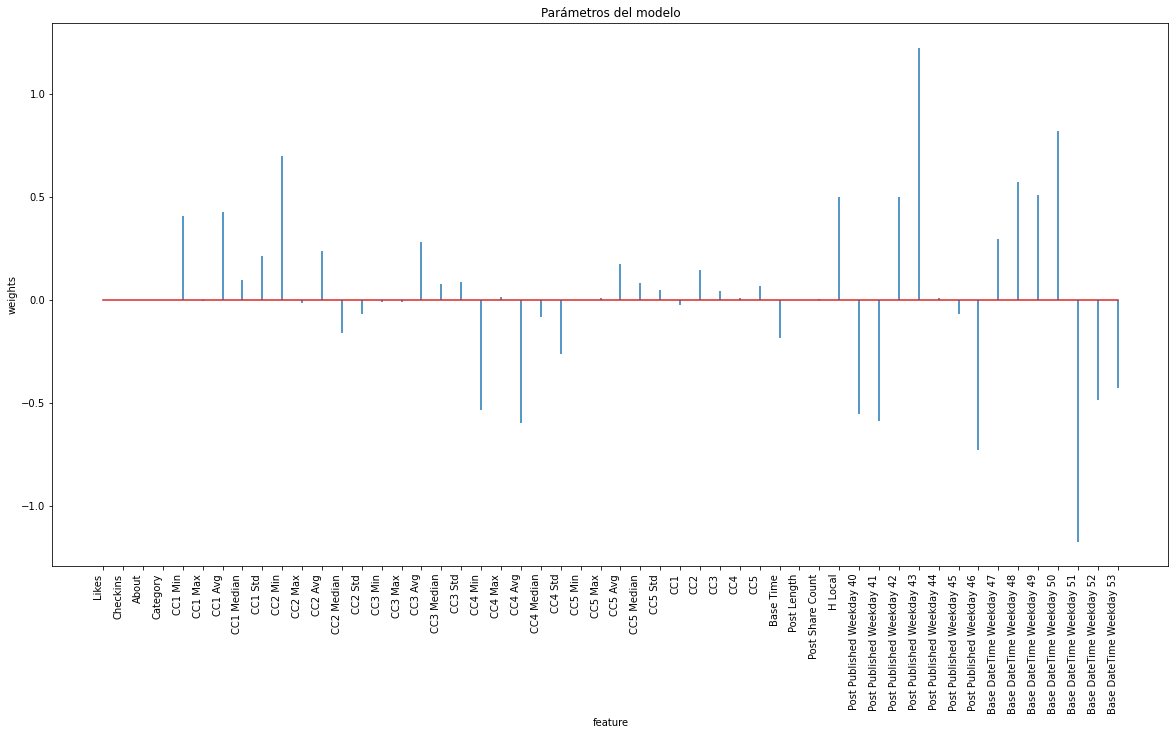

In [27]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': ridgeModel.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

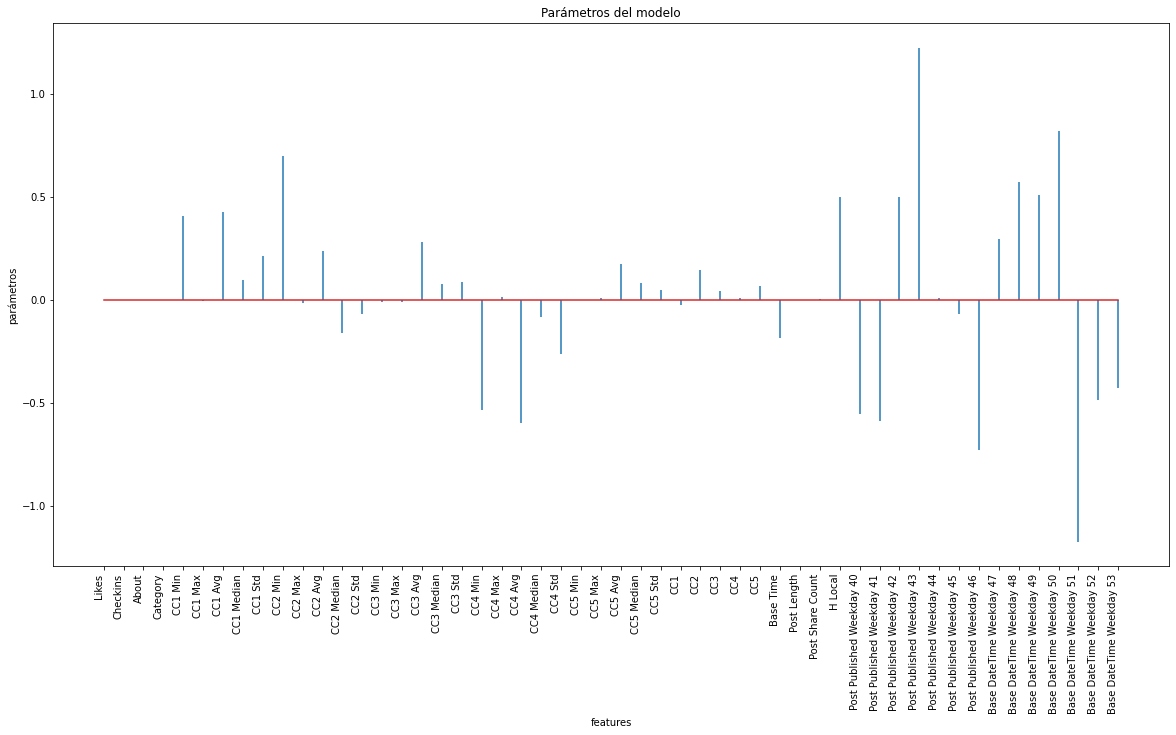

In [28]:
# Parámetros del modelo

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': ridgeModel.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [29]:
# Predicciones test

predicciones = ridgeModel.predict(X = X_test)
predicciones = predicciones.flatten()
predicciones[:20]

array([ 7.62526741,  3.48518813,  5.10844094, -6.14563116,  6.38832976,
        5.31017627,  9.34787768, 10.21528757, 17.26103609, 20.25055067,
       15.74615463,  0.16238912,  1.1994761 , 11.08054769, -3.27656536,
       27.40565605, 60.33350776, 26.66890798,  5.55088952, -1.87841082])

In [30]:
# Error de test del modelo 

rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_ridge}")

El error (rmse) de test es: 26.151672594427964


In [31]:
# Error de test del modelo 

rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_ridge}")

El error (rmse) de test es: 26.151672594427964


In [32]:
ridgeModel.score(X_test,y_test)

0.37031423793257734

## Regresion Lasso

In [60]:
alphasL = np.logspace(-4, -0.5, 30)
lassoModel = LassoCV(
            alphas          = alphasL,
            normalize       = True,
            cv              = 5,
            max_iter=500
         )

_ = lassoModel.fit(X = X_train, y = y_train.flatten())

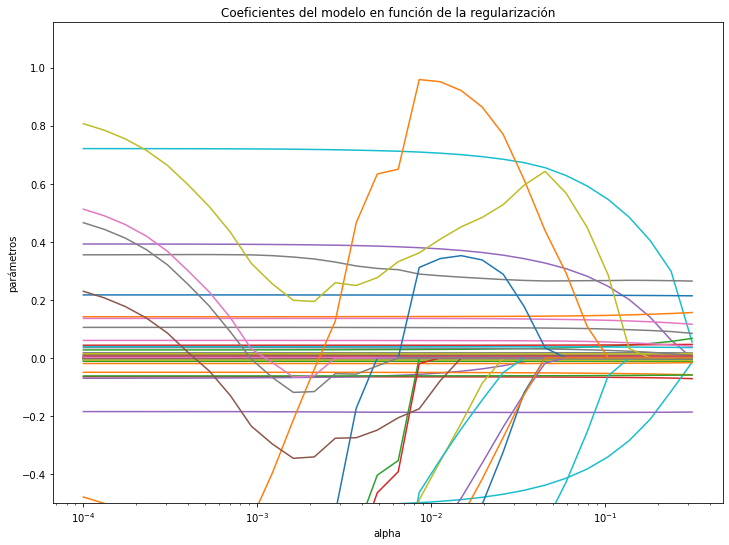

In [61]:
# Evolución de los parámetros en función de alpha

alphas = lassoModel.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True,max_iter=100)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(12, 8.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.set_title('Coeficientes del modelo en función de la regularización');

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

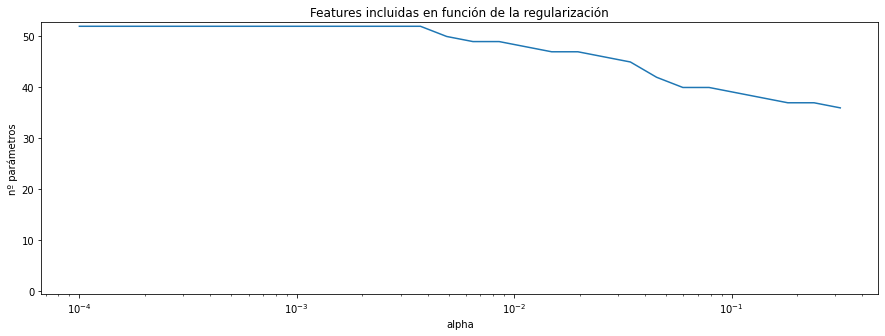

In [63]:
# Número de features incluidas (parámetros !=0) en función de alpha

alphas = lassoModel.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True, max_iter=100)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

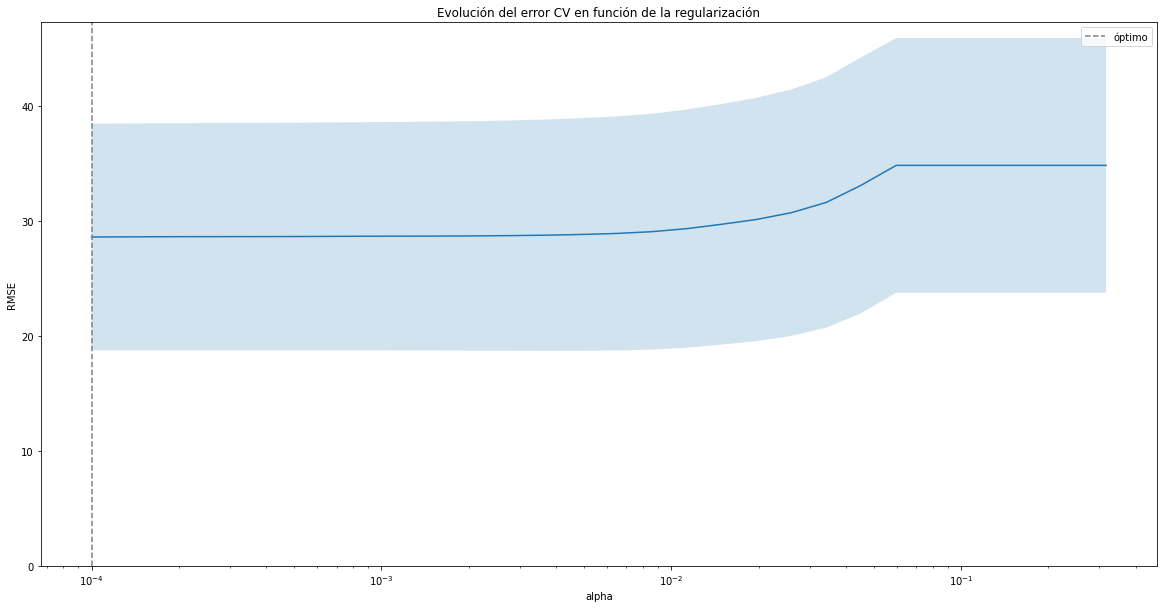

In [64]:
# Evolución del error de validación cruzada en función de alpha

mse_cv = lassoModel.mse_path_.mean(axis=1)
mse_sd = lassoModel.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
optimo       = lassoModel.alphas_[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(lassoModel.alphas_, rmse_cv)
ax.fill_between(
    lassoModel.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend()
plt.show()

In [65]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {lassoModel.alpha_}")

Mejor valor de alpha encontrado: 0.0001


In [67]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': lassoModel.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,Likes,2.372164e-08
1,Checkins,-4.540493e-06
2,About,-9.885310e-06
3,Category,4.885712e-03
4,CC1 Min,-3.500232e-03
5,CC1 Max,1.606613e-03
7,CC1 Median,6.901186e-03
8,CC1 Std,3.967275e-02
9,CC2 Min,4.118542e-01
11,CC2 Avg,2.663605e-01


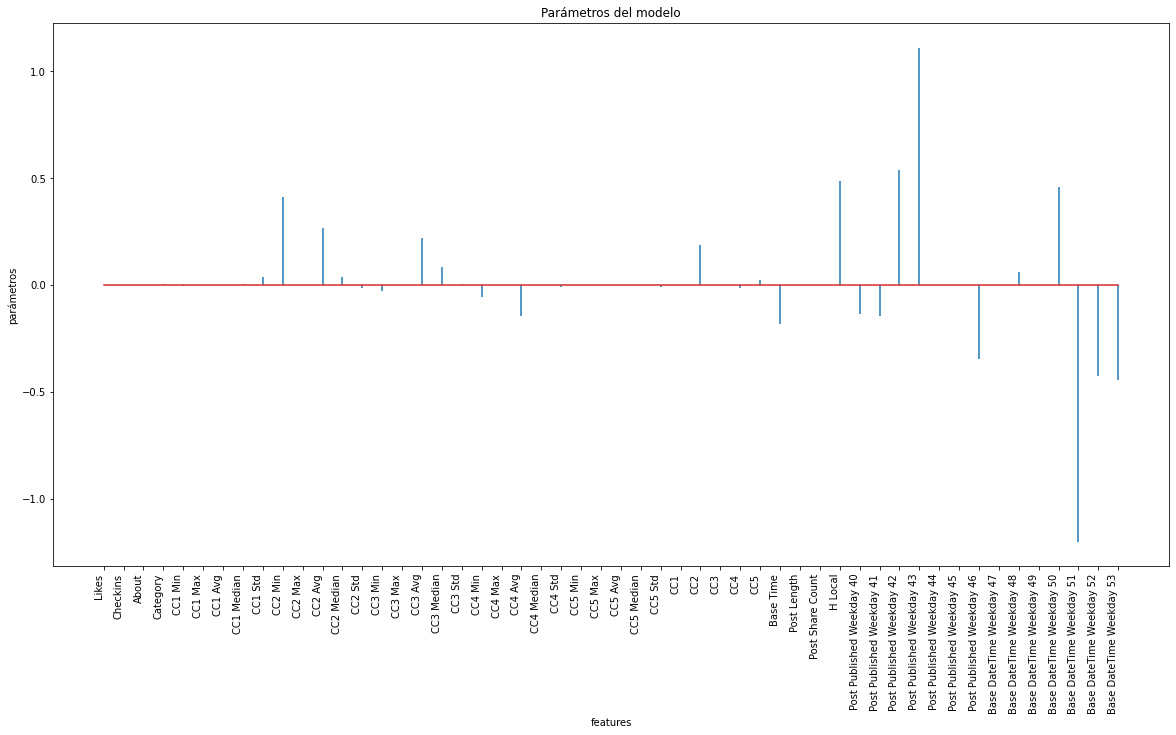

In [68]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [70]:
predicciones = lassoModel.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 8.74283761,  3.17342412,  5.84664949, -5.46726757,  6.83367974,
        5.02921299,  8.70875768, 10.80101281, 18.53875406, 19.73954823])

In [71]:
# Error de test del modelo 

rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 26.156522058061068


In [73]:
lassoModel.score(X_test,y_test)

0.3700806833620427

## Elastic NeT

In [74]:
elasticModel = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 10, 200),
            normalize       = True,
            cv              = 10
         )
_ = elasticModel.fit(X = X_train, y = y_train.flatten())

In [75]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = elasticModel.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [elasticModel.l1_ratio, elasticModel.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,modelo.alphas_,mse_cv,rmse_cv
1384,0.99,3.217642e-09,817.012202,28.583425
1385,0.99,2.552908e-09,817.012226,28.583426
1191,0.95,6.368250e-10,817.012342,28.583428
799,0.70,1.000000e-10,817.012353,28.583428
994,0.90,3.180626e-10,817.012360,28.583428
...,...,...,...,...
509,0.50,1.109752e-01,1215.039817,34.857421
508,0.50,1.398713e-01,1215.039817,34.857421
507,0.50,1.762914e-01,1215.039817,34.857421
505,0.50,2.800504e-01,1215.039817,34.857421


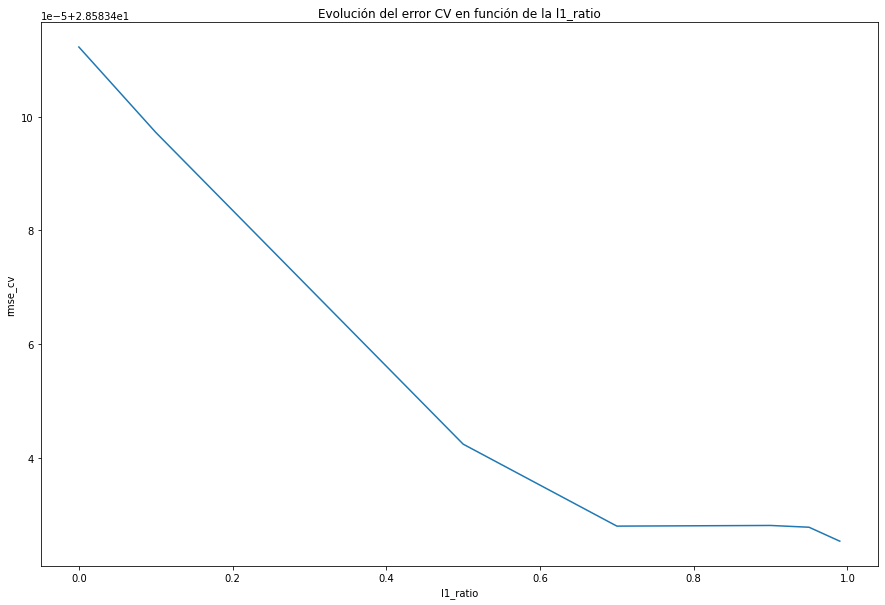

In [76]:
fig, ax = plt.subplots(figsize=(15, 10))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [78]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {elasticModel.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {elasticModel.l1_ratio_}")

Mejor valor de alpha encontrado: 3.217641750250735e-09
Mejor valor de l1_ratio encontrado: 0.99


In [79]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': elasticModel.coef_.flatten()}
                  )

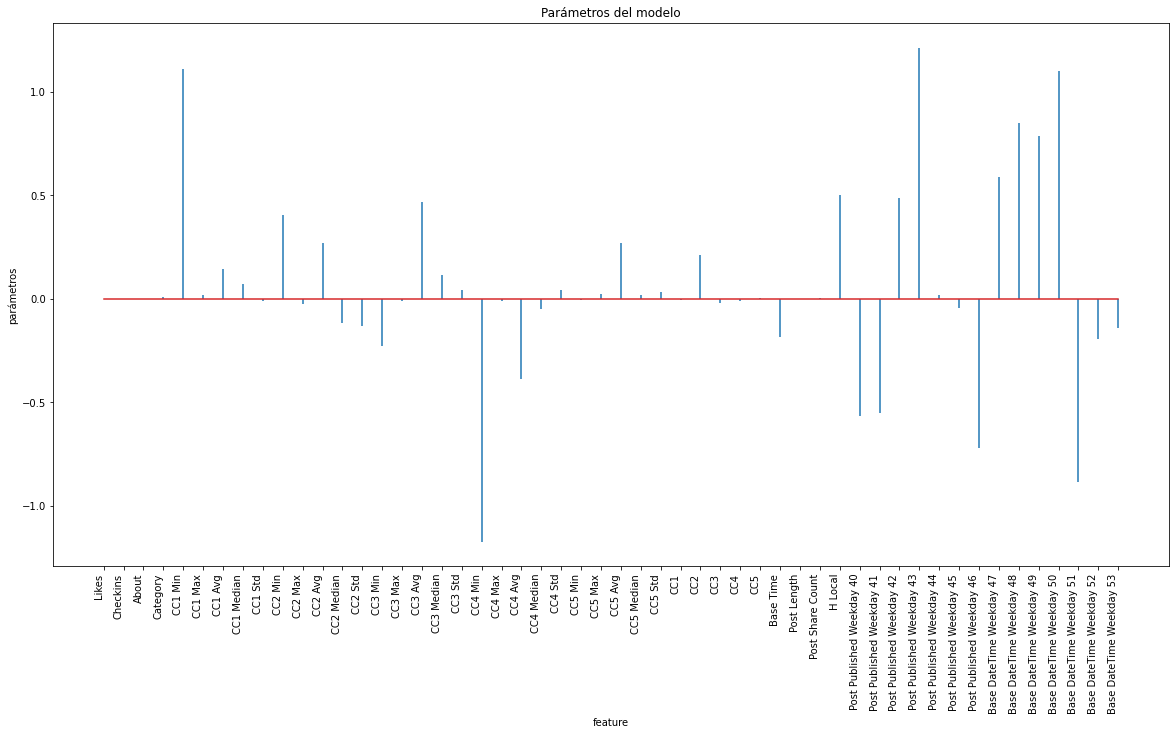

In [80]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [82]:
# Predicciones test

predicciones = elasticModel.predict(X=X_test)
predicciones = predicciones.flatten()

In [83]:
# Error de test del modelo 

rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 26.153403901501164


In [84]:
elasticModel.score(X_test,y_test)

0.3702308615828509

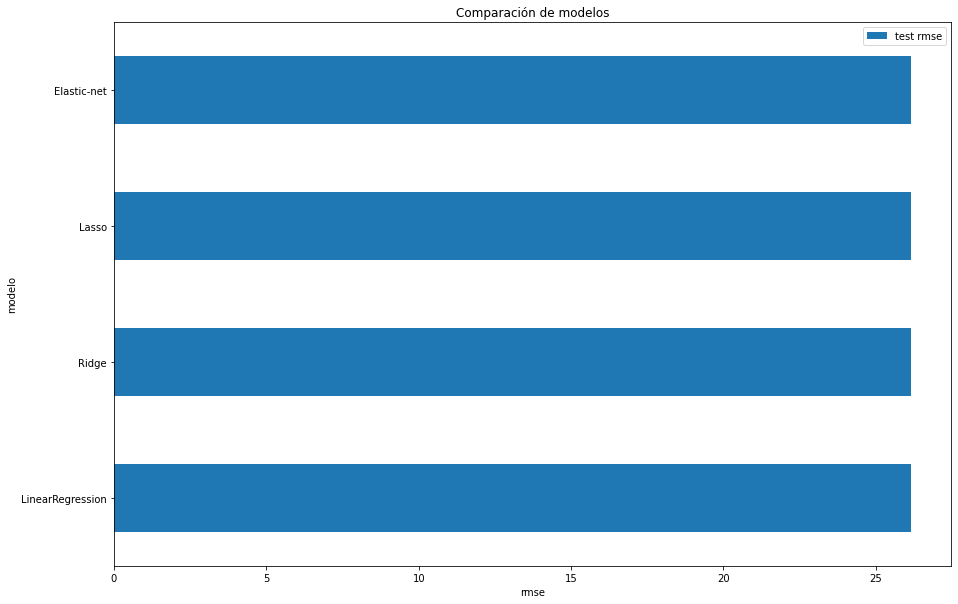

In [85]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

### Conclusiones Generales.

Se concluye que para el dataset dado, no obtenemos diferencias en la aplicacion de los diferentes modelos. La razón probablemente radique en la selección de los diferentes párametros de cada uno de los modelos, mas allá que se realizaron varios cambios y pruebas sin lograr grandes cambios en los cálculos. 

Además, en un primer momento, se decidió quitar varios features que se creian irrelevantes, pero al calcular la regresion lineal, empeoró el resultado significativamente. 

Como conclusión positiva de la realización de estos 4 modelos, al no ver mejorias en los resultados, se puede optar por utilizar regresion lineal ya que el procesamiento de los datos y cálculos, requieren menor potencia de cómputo comparados con los demás tests..

#### Observaciones adicionales.

Se investigó sobre este dataset en la web, encontrando muy poca información sobre aplicaciones realizadas.
Se encontró un estudio donde se aplican 4 modelos diferentes y sus resultados fueron:

$\begin{matrix}
   Modelo & MSE \\
   \\
   Linear Regression & 69.00 \\
   Decision Tree & 60.52 \\
   Random Forest & 57.8 \\
   Neural Network & 111.2 \\
\end{matrix}$


Como se puede ver, el algoritmo que mejor se ajustó fue Random Forest. Además se pudo comprobar que el error obtenido en Regresion lineal fue similar al estudio realizado. 

fuente: [Link](https://github.com/wusixuan2/facebook-comment-volume-prediction/blob/master/report.pdf)